In [4]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import scipy as sp
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

# Z-검정

## 1-표본 Z-검정
- 분산의 값을 정확히 알고 있는 경우에 사용
- 별도의 라이브러리는 존재하지 않는다.

In [2]:
import scipy.stats as sp

In [16]:
# 귀무가설 기각(1종 오류)
# 귀무가설이 맞미나 유의확률은 낮은 경우
n = 10 
mu = 0
sigma2 = 1

In [19]:
np.random.seed(0)
x = sp.norm(mu).rvs(n) # 정규분포가 맞는데 ...

In [20]:
z = (x.mean() - mu) / (sigma2 / len(x)) ** 0.5
pval = sp.norm().sf(np.abs(z) )
z, pval # 아니라고 한다

(2.3338341854824276, 0.009802203010841769)

# T-검정

## 1-표본 t-검정

### scipy.stats.ttest_1samp
- [바로가기](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp)
- 함수 원형
```
scipy.stats.ttest_1samp(
    a, 
    popmean, 
    axis=0, 
    nan_policy='propagate', 
    alternative='two-sided', 
    *, 
    keepdims=False
)
```

In [6]:
from scipy import stats
from scipy.stats import ttest_1samp

In [7]:
rvs = stats.uniform.rvs( size=50 )
rvs

array([0.25691911, 0.43241898, 0.7326889 , 0.63158396, 0.2808299 ,
       0.25246772, 0.56543942, 0.82385406, 0.76467736, 0.4472907 ,
       0.86489482, 0.47100526, 0.51030858, 0.37065626, 0.18033817,
       0.64428006, 0.36896558, 0.55330826, 0.92948127, 0.02073572,
       0.35590362, 0.96954492, 0.46370323, 0.85590093, 0.50330489,
       0.76555636, 0.91585124, 0.16673639, 0.27592016, 0.90471617,
       0.0603725 , 0.45840118, 0.37958094, 0.39954663, 0.77094704,
       0.04780625, 0.48910092, 0.75954953, 0.8612784 , 0.0216658 ,
       0.68094188, 0.19456357, 0.44886555, 0.92208057, 0.86952715,
       0.10335217, 0.23461862, 0.77008103, 0.30421902, 0.2421083 ])

In [8]:
ttest_1samp( rvs, popmean=0.5 )

Ttest_1sampResult(statistic=0.15041820561146496, pvalue=0.8810521735195176)

In [10]:
rvs = stats.norm.rvs( size=50 )
ttest_1samp( rvs, popmean=0.5 )

Ttest_1sampResult(statistic=-3.15977004064562, pvalue=0.00270547830242588)

## 독립표본 t-검정

### scipy.stats.ttest_ind
- [바로가기](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind)
- 함수 원형
```
scipy.stats.ttest_ind(
    a, b, 
    axis=0, 
    equal_var=True, 
    nan_policy='propagate', 
    permutations=None, 
    random_state=None, 
    alternative='two-sided', 
    trim=0
)
```

In [11]:
from scipy.stats import ttest_ind

In [17]:
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500 )
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500 )

In [18]:
ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=-0.5100072468266222, pvalue=0.6101591522653469)

In [23]:
rvs3 = stats.norm.rvs(loc=5, scale=20, size=100 )
print( ttest_ind(rvs1, rvs3) )
print( ttest_ind(rvs1, rvs3, equal_var=False ) )

Ttest_indResult(statistic=-1.057508488707401, pvalue=0.2907065809390743)
Ttest_indResult(statistic=-0.6743455315767852, pvalue=0.501531096392113)


In [25]:
rvs4 = stats.norm.rvs( loc=8, scale=20, size=100 )
print( ttest_ind( rvs1, rvs4 ) )
print( ttest_ind( rvs1, rvs4, equal_var=False ) )

Ttest_indResult(statistic=-2.6730441206912032, pvalue=0.0077218051227199115)
Ttest_indResult(statistic=-1.727698920566838, pvalue=0.08688409419284876)


## 대응표본 t-검정
- 독립표본 t-검정을 두 집단의 표본이 1:1 대응하는 경우에 대해서 수정한 것

### scipy.stats.ttest_rel
- [바로가기](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel)
- 함수 원형
```
scipy.stats.ttest_rel(
    a, b, 
    axis=0, 
    nan_policy='propagate', 
    alternative='two-sided', 
    *, 
    keepdims=False
)
```

In [26]:
from scipy.stats import ttest_rel

In [27]:
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500 )
rvs2 = (
	stats.norm.rvs(loc=5, scale=10, size=500 ) + 
	stats.norm.rvs(scale=0.2, size=500 )
)

In [28]:
stats.ttest_rel(rvs1, rvs2)

Ttest_relResult(statistic=1.6087429083883615, pvalue=0.10830501950364764)

In [29]:
rvs3 = (
    stats.norm.rvs(loc=8, scale=10, size=500 ) + 
    stats.norm.rvs(scale=0.2, size=500 )
)

In [30]:
stats.ttest_rel(rvs1, rvs3)

Ttest_relResult(statistic=-3.2730639987375207, pvalue=0.0011376410245255264)

# 모비율 검정
- 모비율 p가 어떤값을 가질 때, 설정된 2개의 가설 중에서 `하나의 가설을 선택`하는 방법
- 예)
  $$
    H_0: p = 0.06, \\
    H_1: p \neq 0.06 \\ 
  $$
  
- 표본비율
  - x = 발생건수
  - n = 전체 관측된 수
$$
  
  \hat{p} = { x \over n }
$$

- 표준화
$$
  z = { \hat{p} - p \over \sqrt{ { p(1-p) \over n}}} \sim N(0,1)
$$



# F-검정
- 두 집단 이상의 분산의 차이에 대한 검정
- 함수 원형
```
scipy.stats.f_oneway(*samples, axis=0)
```

In [90]:
a = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]
b = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835, 0.0725]
c = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
d = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
e = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

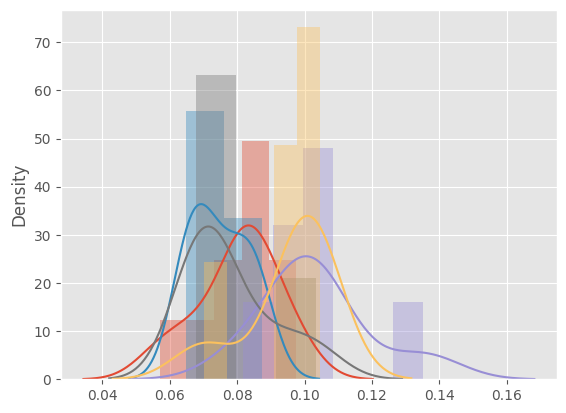

In [92]:
sns.distplot( a )
sns.distplot( b )
sns.distplot( c )
sns.distplot( d )
sns.distplot( e )
plt.show()

In [91]:
sp.f_oneway( a, b, c, d, e )

F_onewayResult(statistic=7.121019471642447, pvalue=0.0002812242314534544)

# 카이제곱 검정

## 적합성 검정
- k개의 범주를 가지는 한 개인 요인(factor)에 대해서 어떤 이론적 분포를 따르고 있는지를 검정
  - 즉, 하나의 범주형 변수에 대한 관측 값들이 어떤 이론적 분포를 띄는지 검정

- 가설 예시
  - 귀무가설(H0): 각 범주 별로 주어진 확률이 사실이다.
  - 대립가설(H1): 각 범주 별로 주어진 확률 중 하나 이상은 사실이 아니다.

### scipy.stats.chisquare
- 함수 원형
```
scipy.stats.chisquare(f_obs, f_exp=None, ddof=0, axis=0)
```

- 주요 파라미터
  - f_obs: 각 범주에서 관찰된 빈도
  - f_exp: 각 범주의 예상 빈도(기본적으로 범주는 동일한 가능성이 있다고 가정)
  - ddof: 자유도
  - axis: 축

- 교재 예제

| 구분 | N사 | O사 | S사 | P사 | 합계 |
|:---:|:---:|:---:|:---:|:---:|:---:|
| 점유율 | 68% | 13% | 11% | 8% | 100% |
| 구입 라면(명) | 285 | 66 | 55 | 44 | 450 |

In [6]:
# 관찰된 빈도
obs = np.array([ 285, 66, 55, 44] )

# 각 범주의 예상 빈도
pr = np.array( [0.68, 0.13, 0.11, 0.08] )
n = obs.sum()
E = n * pr

print("observed:", obs)
print("proportion:", pr)
print("expected:", E)

observed: [285  66  55  44]
proportion: [0.68 0.13 0.11 0.08]
expected: [306.   58.5  49.5  36. ]


In [8]:
# p-value 0.18로 귀무가설을 기각할 수 없다.
# 즉, 통계적으로 변화가 없다. 
sps.chisquare( obs, E)

Power_divergenceResult(statistic=4.791603821015586, pvalue=0.1877085977311163)

## 독립성 검정
- 서로 다른 두 범주형 변수에 대해 연관성이 있는지를 검정
  - 즉, 두 범주형 변수들 사이의 관계가 서로 독립인지 아닌지를 검정

- 가설 예시
  - 귀무가설(H0): 두 범주형 변수는 서로 독립이다.(연관성이 없다.)
  - 대립가설(H1): 두 범주형 변수는 독립적인 관계가 아니다(연관성이 있다.)

### scipy.stats.chi2_contingency
- 함수 원형
```
scipy.stats.chi2_contingency(observed, correction=True, lambda_=None)
```

- 주요 파라미터
  - observed: 빈도 테이블, 각 범주에서 관찰된 빈도

- 교재 예제

| 결함유형구분 | 생산라인1 | 생산라인2 | 생산라인3 |
|:---:|:---:|:---:|:---:|
| 상판 | 11 | 25 | 27 |
| 다리 | 15 | 31 | 28 |
| 서랍 | 44 | 24 | 52 |
| 도색 | 10 | 17 | 16 |

In [10]:
defective = np.array([
  [11, 25, 27],
  [15, 31, 28],
  [44, 24, 52],
  [10, 17, 16],
])

column_names = [ 'Line1', 'Line2', 'Line3']
row_names = [ '상판', '다리', '서랍', '도색']
table = pd.DataFrame( defective, columns=column_names, index=row_names)
table

,Line1,Line2,Line3
상판,11,25,27
다리,15,31,28
서랍,44,24,52
도색,10,17,16


In [13]:
# 귀무가설 기각
# 즉, 생상라인과 결함유형은 통계적으로 관련성이 있다. 
chi2, p_value, dof, expected = sps.chi2_contingency( table )
print(chi2, p_value)

17.8473725144853 0.006625156046928181


Bad pipe message: %s [b'\x1a_dq\xc1\xdb\xb1\x1a-\x99\x14\raD\xa3\xd0\x98Z \xd2%\x03\xe5\xa8\xd5\xb8\xe6\xf1m\xf6\xfb*1\xe3\xc5?\x0e\xde$x\x9c\x8c\xab\x15Qk\xac\xa8S\xbd\xac\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00', b'\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05']
Bad pipe message: %s [b'\x03\x08']
Bad pipe message: %s [b'\x08\x08\t\x08\n\x08']
Bad pipe message: %s [b'\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06']
Bad pipe message: %s [b'']
Bad pipe message: %s [b'\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 s\x90\x1b\xab\x8ek\x06\xacQ\x02\xfe\xfa\x05?\x15\xec \xb8\xcd\xc3\xc3\xf3']
Bad pipe message: %s [b'\xc9\xd6\xf2\xae\xa9\xc2\x9212a\x97\x04\x95\xb7\xd5\x89\x87( \xb4\xbeE\\\xcb\xd2\x0b\x88\xd7]\xc1 n\xd2\x7f\xf7KT\x12\xe0\xa6^\xd9\xcb\xa3\xae\xce\xa9\xdf`m\x05\x00\x08\x13\x02\x13\x03\x13\x01\

## 동질성 검정
- 가설 예시
  - 귀무가설(H0): 각 생산라인별 결함유형의 비율은 같다(동질적이다.)
  - 대립가설(H1): 각 생산라인별 결함유형의 비율은 같지 않다.(동질적이지 않다. )
- 절차는 독립성 검정과 동일

# 비모수 검정
- 검정하고자 하는 모집단의 분포에 대한 가정을 할 수 없을 때사용
- 명목, 서열, 구간, 비율 등 어떠한 척도에 대해서도 사용이 가능 
  - 단, 정확도는 모수적 검정에 비하면 낮다.

| 구분 | 모수적 검정 | 비모수적 검정 |
|:---|:---|:---|
| 독립적 | 독립표본 T-검정 | Mann-Whitney U 검정 |
| 비독립적 | 대응 표본 T-검정 | Wilcoxon Singned-Ranked 검정 |
| 세 집단 이상 | One-Way Anova | Kruskal-Wallis H 검정 |
| 비독립적, 세 집단 이상 | AnovaRM | Friedman 검정 |

## Mann-Whitney U 검정
- Wilcoxon rank-sum(순위합) 검정으로 불리기도 한다.
- 두 독립인 모집단의 분포를 비교하는 검정, 독립표본 T-검정의 비모수 버전
- 두 집단 각각의 값들의 순위합을 구하고, 그것의 차이가 통계적으로 유의한지 확인
  - 두 집단의 평균과 표준편차는 상관없기 때문에 정규분포를 따르지않아도 검정이 가능
  - 순위만 비교하기 때문에 두 그룹의 크기의 차이는 언급할 수 없다.

- 가설 예시
  - 귀무가설(H0): 두 모집단의 분포가 동일하다.
  - 대립가설(H1): 두 모집단의 분포가 동일하지 않다.

In [15]:
# 귀무가설 채택
# 두 모집단의 분포는 동일하다.
x = [170, 60, 45, 90, 95, 80, 85 ]
y = [100, 95, 55, 65, 75, 75 ]
sps.mannwhitneyu(x, y)

MannwhitneyuResult(statistic=18.5, pvalue=0.38724665305627315)

## Wilcoxon 부호-순위 검정
- 두 짝을 이룬 모집단의 분포를 비교하는 검정으로 대응표본-T 검정의 비모수 버전
- 가설 예시
  - 귀무가설(H0): 두 짝을 이룬 표본은 동일한 모집단에서 나온 것이다.
  - 대립가설(H1): 두 짝을 이룬 표본은 동일한 모집단에서 나온 것이 아니다.

In [17]:
# 사전과 사후가 함께 있으니 두 집단이지만
# 사전 - 사후 이니 결국엔 한 집단
# 결국 d(difference)만 본다면 일표본 검정과 같아진다.

# 귀무가설 채택
# 두 표본은 동일한 모집단에서 나온 것
d = [ 1.5, 1.5, -3, -4, -5, -6, 7, 8, 9 ]
sps.wilcoxon(d)

WilcoxonResult(statistic=18.0, pvalue=0.65234375)

## Kruskal - Wallis H 검정
- 분산분석에 대응하는 비모수적 검정 방법
  - 그룹의 순위차가 통계적으로 유의한지 검정
  - 모든 자료를 한데 모아 크기순으로 정렬한 다음 가장 작은 값부터 순위를 매겨 그룹별 순위를 구한다.
  - 이 순위합이 통계적으로 유의한 차이가 있는지 검정

- 가설 예시
  - 위의 두 가설의 예시와 동일

In [18]:
from sklearn.datasets import load_iris

In [42]:
rawData = load_iris()
iris = pd.DataFrame( rawData['data'], columns=rawData['feature_names'] )
iris['target'] = rawData['target']
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [48]:
# 귀무가설 기각
# 품종에 따라서 꽃잎의 길이가 통계적으로 유의미한 차이가 있다.

sps.kruskal(
  iris.loc[ iris.target == 0, 'petal length (cm)'],
  iris.loc[ iris.target == 1, 'petal length (cm)'],
  iris.loc[ iris.target == 2, 'petal length (cm)']
)

KruskalResult(statistic=130.41104857977163, pvalue=4.803973591157605e-29)

## Friedman 검정
- 반복측정 분산분석에 대응한 비모수적 검정 방법
  - 그룹의 순위합으로 차이가 통계적으로 유의미한지 검정
  - 비독립적 검정 방법으로, 같은 그룹의 세 번 이상의 기간 동안의 변화를 비교하는데 유용

In [54]:
# 평균과 분산이 동일한 모집단으로 부터
# 분산만 변화를 준 경우

# 귀무가설 기각, 대립가설 채택
# 각 표본별 분포의 차이가 있다.
rvs1 = sps.norm.rvs(loc=5, scale=10, size=500 )
rvs2 = (
	sps.norm.rvs(loc=5, scale=10, size=500 ) + 
	sps.norm.rvs(scale=0.2, size=500 )
)
rvs3 = (
	sps.norm.rvs(loc=5, scale=10, size=500 ) + 
	sps.norm.rvs(scale=0.8, size=500 )
)

sps.friedmanchisquare( rvs1, rvs2, rvs3 )

FriedmanchisquareResult(statistic=7.695999999999913, pvalue=0.02132233849911491)

# 등분산 검정
- bartlett, levene 등

## bartlett
- 함수 원형
```
scipy.stats.bartlett(*samples)
```

In [21]:
a = [8.88, 9.12, 9.04, 8.98, 9.00, 9.08, 9.01, 8.85, 9.06, 8.99]
b = [8.88, 8.95, 9.29, 9.44, 9.15, 9.58, 8.36, 9.18, 8.67, 9.05]
c = [8.95, 9.12, 8.95, 8.85, 9.03, 8.84, 9.07, 8.98, 8.86, 8.98]

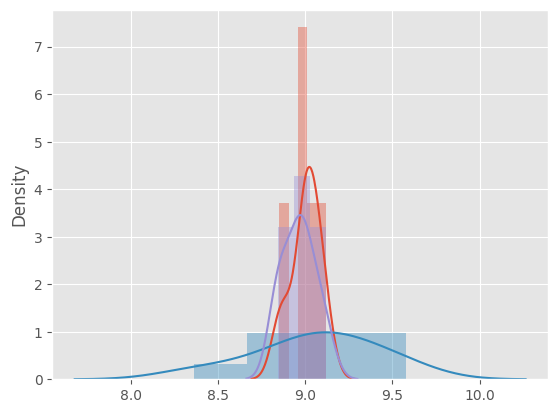

In [26]:
sns.distplot( a )
sns.distplot( b )
sns.distplot( c )
plt.show()

In [22]:
sp.bartlett( a, b, c )

BartlettResult(statistic=22.789434813726768, pvalue=1.1254782518834628e-05)

# 정규성 검정
- shapiro-wilk, kolmogorov-smirnov, jarque-bera

## shapiro-wilk
- 함수원형
```
scipy.stats.shapiro(x)[source]
```

In [85]:
# 5000개 이하의 샘플
x = sp.norm.rvs( loc=5, scale=3, size=100 )

<AxesSubplot:ylabel='Density'>

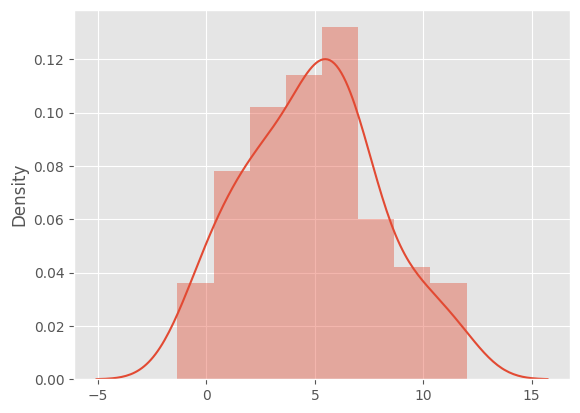

In [86]:
sns.distplot( x )

In [87]:
sp.shapiro(x)

ShapiroResult(statistic=0.9858458638191223, pvalue=0.364793062210083)

## jarque-bera
- 함수원형
```
scipy.stats.jarque_bera(x, *, axis=None, nan_policy='propagate', keepdims=False)
```

In [88]:
# 데이터가 충분히 큰 경우(> 2000)
sp.jarque_bera(x)

Jarque_beraResult(statistic=1.385433062312748, pvalue=0.5002153710731693)

## kolmorov-smirnov
- 2 데이터의 분포를 확인할때에도 사용이 가능
  - 1개의 데이터를 입력하고, 정규분포를 입력하면 1개의 데이터가 정규분포를 따르는지 확인이 가능
  - 2개의 데이터에 대한 검증이 가능하기 때문에 양측, 단측 검정이 가능
  - 누적확률분포를 사용하여 분포에 대한 검정 가능
- 함수원형
```
scipy.stats.kstest(rvs, cdf, args=(), N=20, alternative='two-sided', method='auto')
```

In [89]:
sp.kstest( x, 'norm' )

KstestResult(statistic=0.8029819487166002, pvalue=4.245063668706878e-70)

# 상관 분석

## 피어슨 상관계수(scipy.stats.pearsonr)
- 연속형의 두 변수들의 상관관계 측정 방식으로 변수가 정규분포를 따른다고 가정할 때 사용
- 함수 원형
```
scipy.stats.pearsonr(x, y, *, alternative='two-sided')
```

In [56]:
x = [1, 2, 3, 4, 5]
y = [9, 8, 7, 6, 5]
statistic, pvalue = sps.pearsonr(x, y)
print( statistic, pvalue )

-1.0 0.0


## 스피어만 상관계수(scipy.stats.spearmanr)
- 정규분포를 심하게 벗어나는 두 변수들의 상관관계를 측정
  - 순서 자료의 상관관계를 측정하는 경우에도 사용
  - 자료의 순위를 이용한 상관계수

- 함수원형
```
scipy.stats.spearmanr(a, b=None, axis=0, nan_policy='propagate', alternative='two-sided')
```

In [57]:
sps.spearmanr( x, y )

SpearmanrResult(correlation=-0.9999999999999999, pvalue=1.4042654220543672e-24)

## 켄달 순위상관계수(scipy.stats.kendalltau)
- 스피어만 상관계수와 목적은 동일하지만, 계산방식이 다름
  - 자료의 순위를 이용한 상관계수

- 함수원형 
```
scipy.stats.kendalltau(x, y, initial_lexsort=None, nan_policy='propagate', method='auto', variant='b', alternative='two-sided')
```

In [58]:
sps.kendalltau( x, y )

KendalltauResult(correlation=-0.9999999999999999, pvalue=0.016666666666666666)